In [75]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import re

In [2]:
df_master = pd.DataFrame.from_csv('aircraftData/MASTER.txt')

In [3]:
df_aircrafts = pd.DataFrame.from_csv('aircraftData/ACFTREF.txt')

In [4]:
# get all tail numbers in official FAA database
df_delays = pd.DataFrame.from_csv('cache/328211631_T_ONTIME.csv')
df_delays.reset_index(inplace=True)

/Users/David/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (69,74) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [23]:
master = df_master[['MFR MDL CODE', 'YEAR MFR']].reset_index()
aircrafts = df_aircrafts['MFR'].reset_index()
master.columns = ['TAIL_NUM', 'CODE', 'YEAR']
aircrafts.columns = ['CODE', 'MFR']
joined = pd.merge(master, aircrafts, how='left', on='CODE')

In [62]:
delayFinal = df_delays[['TAIL_NUM','AIRLINE_ID']]
delayFinal.TAIL_NUM = delayFinal.TAIL_NUM.str.strip('N')
delaymfr = pd.merge(delayFinal, joined, how='left', on=['TAIL_NUM'])

In [64]:
delaymfr.YEAR

0         1987
1         1987
2          NaN
3         1986
4          NaN
5         1985
6          NaN
7          NaN
8         1988
9         1985
10         NaN
11        1987
12        1987
13        1988
14            
15         NaN
16         NaN
17         NaN
18            
19         NaN
20         NaN
21         NaN
22         NaN
23        1961
24        1961
25        1961
26         NaN
27         NaN
28        1961
29         NaN
          ... 
471919    2000
471920    2000
471921    2000
471922    2012
471923    1995
471924    1999
471925    2007
471926    2008
471927    2000
471928    2000
471929    1998
471930    2000
471931    2000
471932    1999
471933     NaN
471934    2000
471935    2000
471936    1999
471937    1999
471938    2000
471939    2000
471940    2000
471941    2000
471942    2000
471943    2007
471944    2007
471945    2000
471946    2000
471947    1999
471948    2006
Name: YEAR, dtype: object

In [68]:
years = [int(year) for year in delaymfr.YEAR.str.strip().values if (not year != year and (len(year)==4))]

(array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          2.60000000e+01,   0.00000000e+00,   0.00000000e+00,
          1.14000000e+02,   0.00000000e+00,   7.80000000e+01,
          0.00000000e+00,   1.79000000e+02,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.22000000e+02,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   9.00000000e+00,   0.00000000e+00,
          1.91000000e+02,   1.97000000e+02,   1.17000000e+02,
          2.50000000e+01,   1.20000000e+01,   2.20000000e+02,
          1.11000000e+02,   0.00000000e+00,   0.00000000e+00,
          3.40000000e+01,   4.38000000e+02,   1.78000000e+03,
          1.44600000e+03,   4.21000000e+03,   7.00000000e+03,
          4.98200000e+03,   6.90200000e+03,   8.34800000e+03,
          9.80900000e+03,   5.77300000e+03,   5.09000000e+03,
          6.56400000e+03,   6.99900000e+03,   8.02100000e+03,
        

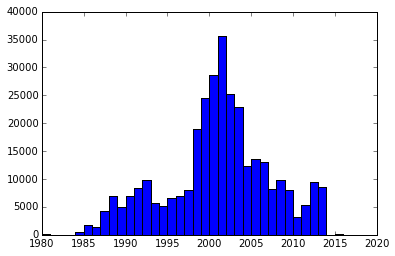

In [78]:
plt.xlim(1980,2020)
plt.hist(years, bins=np.arange(1950, 2020, 1))

In [18]:
# number of missing manufacturers
1.0*delaymfr.MFR.isnull().sum()/len(delaymfr.MFR)

0.29173914978101445